# Genetic Algorithm

The genetic algorithm is a nature-inspired algorithm based on natural selection, that the fittest individuals of a population are selected to reproduce the next generation. 1st of a 3-part series on evolutionary computation (Part 2 - [Neuroevolution](https://jetnew.io/posts/2020/11/neuroevolution/), Part 3 - [Novelty Search](https://jetnew.io/posts/2020/11/novelty-search/)).

The genetic algorithm consists of 5 processes:
1. Initial population
2. Fitness function
3. Selection
4. Crossing-over
5. Mutation

Terminology:
- Population refers to the set of individuals (solution).
- Individual is defined by its chromsome (set of parameters/variables).
- Fitness function refers to the performance measure of an individual.
- Selection refers to the selection of the fittest.
- Crossing-over refers to a swapping of segments of 2 parents' genes, producing a child individual with a new gene combination.
- Mutation is a random perturbation of genes based on a probability.

# Optimization Problem: Linear Regression

Evolutionary algorithms can serve as "black box" optimisation algorithms without needing to solving the objective function analytically. To illustrate that evolutionary algorithms can optimise, the simple linear regression problem is used. Define a linear function:
$$y = mx + c + \epsilon$$
to be modelled by a linear regression model, where $m=1$, $c=0$, $\epsilon\sim N(0,1)$ represents gradient, y-intercept and Gaussian noise respectively.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)  # for reproducibility

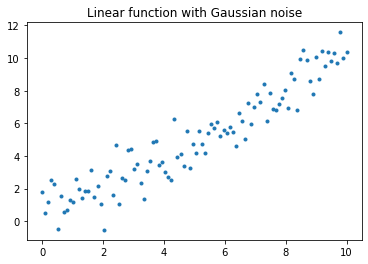

In [2]:
X = np.linspace(0, 10, 100)
y = X + np.random.normal(0, 1, 100)

plt.title("Linear function with Gaussian noise")
plt.plot(X, y, '.')
plt.show()

# Process 1: Generate the initial population of individuals.

Each individual (solution/model) is defined by a set of parameters. Hyperparameters to be specified, which are variables that are not updated at every iteration of optimisation, are the population size (number of individuals in the population at any point in time) and the number of parameters that defines an individual. The initial population's parameters can be zero-initialised or random-initialised. For your interest, there also exists many other initialisation methods to be used depending on context, such as the He initialisation and Xavier initialisation. The set of parameters that defines each individual is biologically analogous to the individual's genome (or gene or chromosome, depending on the computational process).

In [3]:
population_size = 10
num_parameters = 2

# initial_population = np.zeros(shape=(population_size, num_parameters))  # zero initialisation
initial_population = np.random.normal(0, 1, size=(population_size, num_parameters))  # random normal initialisation
initial_population

array([[ 1.8831507 , -1.34775906],
       [-1.270485  ,  0.96939671],
       [-1.17312341,  1.94362119],
       [-0.41361898, -0.74745481],
       [ 1.92294203,  1.48051479],
       [ 1.86755896,  0.90604466],
       [-0.86122569,  1.91006495],
       [-0.26800337,  0.8024564 ],
       [ 0.94725197, -0.15501009],
       [ 0.61407937,  0.92220667]])

# Process 2: Compute the fitness of all individuals.

Another 2 hyperparameters are in the form of functions - the solution and the fitness function. The solution is a model that uses the individual's parameters to compute the output $y$ given input $X$. For simplicity, we use the polynomial regression model (with 2 parameters, it is a simple linear regression model). The fitness function measures the performance of an individual solution. The evolutionary analogy of the fitness function of an organism would be, for example, its survivability and/or reproductive success. Because we want to model the linear function with Gaussian noise dataset, the negative mean squared error (MSE) is used as the fitness function to determine how well the solution models the dataset. Because the fitness function is to be maximised, MSE is negated to reflect a higher value of MSE as more desirable.

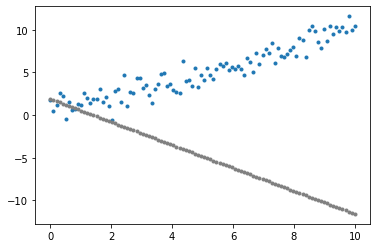

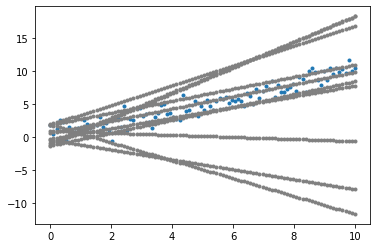

In [4]:
def solution(params):  # Polynomial regression model
  return np.sum([params[i] * X**i for i in range(len(params))], axis=0)

def fitness_function(params):  # Mean squared error
  return -np.sum(abs(y - solution(params))**2) / len(X)

def plot_data():
  plt.plot(X, y, '.')

def plot_individual(individual):
  plt.plot(X, solution(individual), '.', c='grey')

def plot_population(population):
  for individual in population:
    plot_individual(individual)

individual = initial_population[0]
fitness_score = fitness_function(individual)

plot_data()
plot_individual(individual)
plt.show()

plot_data()
plot_population(initial_population)
plt.show()

In [5]:
def compute_fitness(population):
  return np.array([fitness_function(individual) for individual in population])

fitness_scores = compute_fitness(initial_population)
fitness_scores

array([-145.00615079,   -3.20852429,  -21.20939814, -110.93013108,
        -21.41800978,   -2.83355152,  -21.68891802,   -2.97834017,
        -35.66225857,   -1.05527391])

# Process 3: Select the fittest individuals.

Like natural selection, select the top $k$ percentage of individuals with the highest fitness scores, where $k$ is a hyperparameter, to form the parent subpopulation that will reproduce to form the next generation of the population later.

In [6]:
def get_fittest(population, fitness_scores):
  return population[fitness_scores.argmax(), :]

def select_fittest(population, fitness_scores, k=0.5):
  return population[np.argsort(fitness_scores)[-int(len(population) * k):], :]

parent_subpopulation = select_fittest(initial_population, fitness_scores, k=0.2)
parent_subpopulation, compute_fitness(parent_subpopulation)

(array([[1.86755896, 0.90604466],
        [0.61407937, 0.92220667]]),
 array([-2.83355152, -1.05527391]))

# Process 4: Perform crossing-over between parents to produce children.

Crossing-over is a biological process that exchanges genetic material to result in new combinations of genetic material. For the benefit of non-biology students, much detail has been abstracted out, so for your interest, refer to chromosomal crossovers. In the genetic algorithm, crossing-over is performed during reproduction by swapping a segment of parameters of one parent with another parent. For example, take 2 parents defined by 4 parameters:

$$P1 = [A1, A2, A3, A4],  P2 = [B1, B2, B3, B4]$$

A crossing-over at the index 3 will result in a child:

$$C = [A1, A2, B3, B4]$$

There exists other methods of genetic exchange to introduce variance in the population gene pool, such as swapping elements instead of segments.

In [7]:
def perform_crossingover(subpopulation):
  children = []
  for i in range(population_size - len(subpopulation)):
    parents = subpopulation[np.random.randint(0, len(subpopulation), 2)]
    gene_indices = np.zeros(num_parameters).astype(int)
    gene_indices[np.random.randint(len(gene_indices)+1):] = 1  # segment swap
    child = parents[gene_indices, np.arange(num_parameters)]
    children.append(child)
  return np.append(subpopulation, np.array(children), axis=0)

next_population = perform_crossingover(parent_subpopulation)
next_population, compute_fitness(next_population)

(array([[1.86755896, 0.90604466],
        [0.61407937, 0.92220667],
        [0.61407937, 0.92220667],
        [1.86755896, 0.90604466],
        [0.61407937, 0.92220667],
        [0.61407937, 0.92220667],
        [1.86755896, 0.92220667],
        [0.61407937, 0.92220667],
        [1.86755896, 0.92220667],
        [0.61407937, 0.92220667]]),
 array([-2.83355152, -1.05527391, -1.05527391, -2.83355152, -1.05527391,
        -1.05527391, -3.04089715, -1.05527391, -3.04089715, -1.05527391]))

# Process 5: Perform mutation on the population.

A mutation is defined as a change in the DNA sequence. While the exact differences between DNA, gene and chromosome in the genetic algorithm are not maintained, inspiration is drawn from mutation in biology that usually worsens fitness but can occasionally improve fitness of the individual. To perform mutation on the population parameters, add Gaussian noise $\epsilon\sim N(0, \sigma)$ to the individuals' parameters, where $\sigma$ is the standard deviation hyperparameter.

In [8]:
def perform_mutation(population, sigma=0.1):
  return population + np.random.normal(0, sigma, population.shape)  # Gaussian noise

mutated_population = perform_mutation(next_population, sigma=0.01)
mutated_population, compute_fitness(mutated_population)

(array([[1.86732417, 0.90693888],
        [0.6081361 , 0.9211497 ],
        [0.62150733, 0.91465686],
        [1.86617613, 0.88479546],
        [0.60377918, 0.91703215],
        [0.61266137, 0.90944187],
        [1.88237409, 0.93879944],
        [0.61408077, 0.93726506],
        [1.86860417, 0.91984624],
        [0.62227372, 0.92623524]]),
 array([-2.84393595, -1.0525611 , -1.05282308, -2.58416917, -1.04907953,
        -1.04977737, -3.3166936 , -1.07545786, -3.01246558, -1.0622913 ]))

# The Genetic Algorithm: All 5 Processes Together

By combining the 5 processes together, we construct the genetic algorithm and run it to find a solution that models the linear function well.

Genetic Algorithm:
1. Generate the initial population of individuals.
2. Repeat until convergence:
  1. Compute fitness of the population.
  2. Select the fittest individuals (parent subpopulation).
  3. Perform crossing-over between parents to produce children.
  4. Perform mutation on the population.
3. Select the fittest individual of the population as the solution.

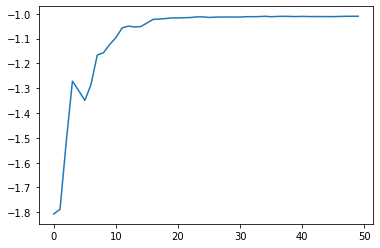

In [9]:
# Define hyperparameters of the genetic algorithm.
population_size = 20
num_parameters = 2
num_generations = 50
top_k = 0.5
mutation_sigma = 0.01

# Process 1: Generate the initial population of individuals.
population = np.random.normal(0, 1, size=(population_size, num_parameters))

# Misc: Experimental tracking
scores = []
solutions = []

# Iterate the process over multiple generations of populations.
for i in range(num_generations):

  # Process 2: Compute the fitness of all individuals.
  fitness_scores = compute_fitness(population)

  # Process 3: Select the fittest individuals.
  fittest_subpopulation = select_fittest(population, fitness_scores, k=top_k)
  
  # Misc: Experimental tracking
  fittest = get_fittest(population, fitness_scores)
  solutions.append(solution(fittest))
  scores.append(fitness_function(fittest))

  # Process 4: Perform crossing-over between parents to produce children.
  children = perform_crossingover(fittest_subpopulation)

  # Process 5: Perform mutation on the population.
  population = perform_mutation(children, sigma=mutation_sigma)


# Misc: Experimental tracking
plt.plot(np.arange(num_generations), scores)
plt.show()

# Experiment Result

The fittest individual in the final population is a reasonably well-fit linear regression model. The rest of the population have a lower fitness score but are quite well-fit as well.

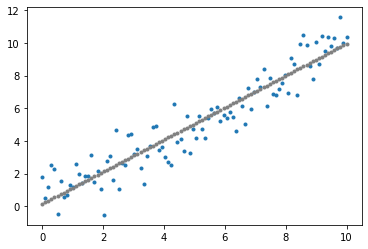

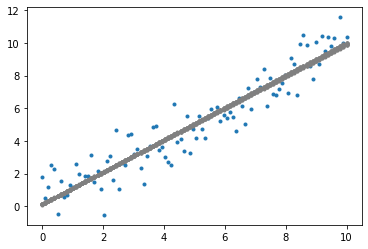

In [10]:
fitness_score = fitness_function(fittest)
y_pred = solution(fittest)

plot_data()
plot_individual(fittest)
plt.show()

plot_data()
plot_population(fittest_subpopulation)
plt.show()

By visualising the fittest model at each generation (iteration) of the genetic algorithm, notice that virtually instantly, the linear regression model fits to the dataset. In fact, linear regression is too simple a problem to realise the effectiveness of the genetic algorithm. Nonetheless, the reason for using linear regression is to bring focus to the genetic algorithm without the overhead of needing to understand the model. For a more complex application of the genetic algorithm using neural networks, refer to [Part 2](https://jetnew.io/posts/2020/11/neuroevolution/) of the Evolutionary Computation series on Neuroevolution. For an evolutionary strategy based on novelty applied on reinforcement learning, refer to [Part 3](https://jetnew.io/posts/2020/11/novelty-search/).